In [518]:
include("network_transmission_workplace.jl")

run_sim (generic function with 1 method)

In [519]:
Params = Dict("SimType"=>Scenario_sim, "ND"=>40, "NL"=>20, "NO"=>10, "p_contact"=>2/69, "Pisol"=>0.5, 
              "InfInit"=>1, "tD"=>1.0, "phi"=>1.0, "p_friend_contact"=>1.0)
PkgParams = Dict("p_fomite_contr"=>0.01, "p_fomite_trans"=>0.01, "Dtime"=>1/6,
                                 "Ltime"=>1/6, "PkgHlife"=>0.5)
PairParams = Dict("is_driver_pairs"=>true, "is_loader_pairs"=>true, "fixed_driver_pairs"=>true,
                  "fixed_loader_pairs"=>true, "is_window_open"=>false)
TestParams = Dict("new_comply_prob"=>0.5, "tperiod"=>4,
                  "protocol"=>LFD_mass_protocol, "specificity"=>0.999,
                  "delay"=>0, "test_pause"=>21)
NWeeks = 20
OCCPD = repeat([0.87,1.0,1.0,0.98,0.91,0.55,0],NWeeks)
incidence = 0.002 *(1 .- (1 .- 2*collect(0:NWeeks*7-1)./(NWeeks*7)).^2)
prevalence = cumsum(incidence) - cumsum(vcat(zeros(7),incidence[1:(end-7)]))
# Plots.plot(incidence)
# Plots.plot!(prevalence)

NP = Int64.(round.(3000 * OCCPD))
results = run_sim(Params, OCCPD, PkgParams, NP; is_network=true, is_pairs=true, 
          testing=true, PairParams=PairParams, TestParams=TestParams, Incidence=incidence, Prevalence=prevalence)

Dict{String,Array} with 29 entries:
  "Prevalence"                   => [0.0, 5.67347e-5, 0.000169388, 0.000337143,…
  "Isolated"                     => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "time"                         => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  131, 132…
  "FomiteInfs"                   => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "ContactInfs"                  => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "RoomInfs"                     => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "Exposed"                      => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "ExternalIntroductions"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "IsolatedDueToTestSymp"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "CustomerIntroductions"        => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "NewSympIsolators"             => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "NewTestSympIsolators"         => [0 0 … 0 0; 0 0 … 0 0; 0 0 … 0 0]
  "PackagesInfectiousOnDelivery" => [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, …
  "Incidence"        

420

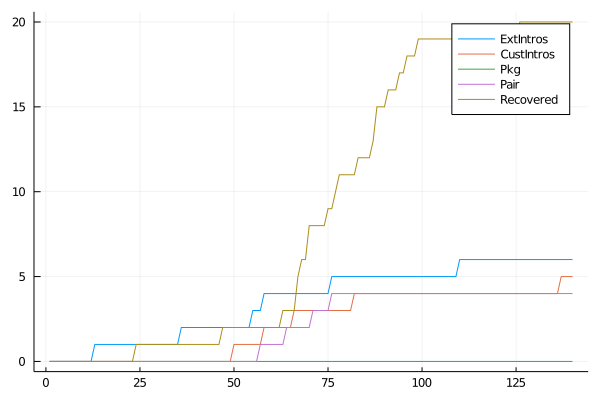

In [502]:
print(length(results["NetworkInfs"]))

#Plots.plot(results["time"],transpose(cumsum(sum(results["NetworkInfs"],dims=1),dims=2)))
#Plots.plot!(results["time"],transpose(cumsum(sum(results["ContactInfs"],dims=1),dims=2)))
#Plots.plot!(results["time"],transpose(cumsum(sum(results["RoomInfs"],dims=1),dims=2)))
Plots.plot(results["time"],transpose(cumsum(sum(results["ExternalIntroductions"],dims=1),dims=2)),label="ExtIntros")
Plots.plot!(results["time"],transpose(cumsum(sum(results["CustomerIntroductions"],dims=1),dims=2)),label="CustIntros")
Plots.plot!(results["time"],transpose(cumsum(sum(results["FomiteInfs"],dims=1),dims=2)),label="Pkg")
Plots.plot!(results["time"],transpose(cumsum(sum(results["PairInfs"],dims=1),dims=2)),label="Pair")
R = results["Recovered"]
Rsum = sum(R,dims=1)
Plots.plot!(results["time"],transpose(Rsum),label="Recovered")


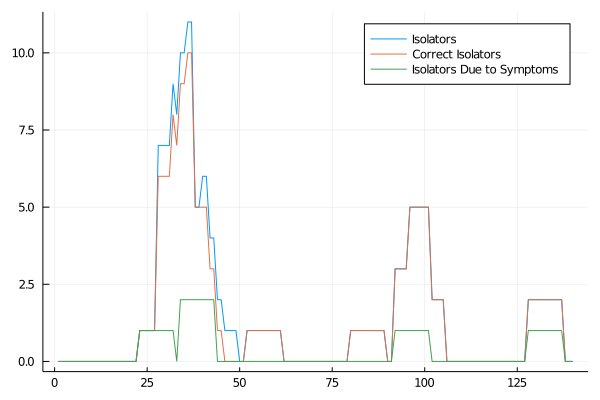

In [521]:
#Plots.plot(results["time"],transpose(sum(results["Infectious"],dims=1)),label="Infectious")
IS = results["Isolated"] 
Plots.plot(results["time"],transpose(sum(IS,dims=1)),label="Isolators")
IS1 = IS .- results["IsolatedDueToFalsePos"]
Plots.plot!(results["time"],transpose(sum(IS1,dims=1)),label="Correct Isolators")
IS2 = IS1 .- results["IsolatedDueToTestAsymp"] .- results["IsolatedDueToTestSymp"]
Plots.plot!(results["time"],transpose(sum(IS2,dims=1)),label="Isolators Due to Symptoms")
#Plots.plot!(results["time"],transpose(sum(results["IsolatedDueToFalsePos"],dims=1)),label="Test Isolation FalsePos")
#Plots.plot!(results["time"],100*results["Incidence"])

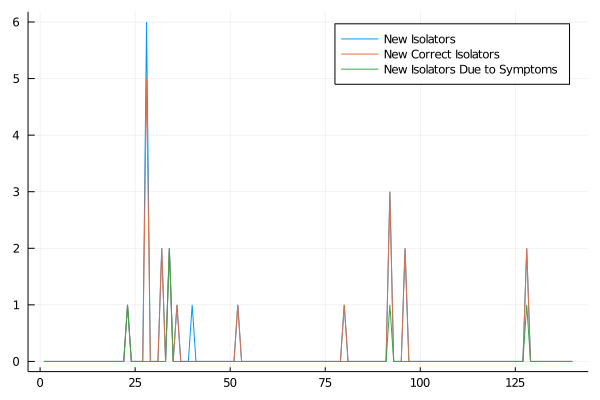

In [523]:
#Plots.plot(results["time"],transpose(sum(results["Infectious"],dims=1)),label="Infectious")
IS = results["NewIsolators"] 
Plots.plot(results["time"],transpose(sum(IS,dims=1)),label="New Isolators")
IS1 = IS .- results["NewFalseIsolators"]
Plots.plot!(results["time"],transpose(sum(IS1,dims=1)),label="New Correct Isolators")
IS2 = IS1 .- results["NewTestSympIsolators"] .- results["NewTestAsympIsolators"]
Plots.plot!(results["time"],transpose(sum(IS2,dims=1)),label="New Isolators Due to Symptoms")
#Plots.plot!(results["time"],transpose(sum(results["IsolatedDueToFalsePos"],dims=1)),label="Test Isolation FalsePos")
#Plots.plot!(results["time"],100*results["Incidence"])

In [520]:
print(sum(results["NewIsolators"] .- results["NewFalseIsolators"])/sum(results["Recovered"],dims=1)[end])

0.6060606060606061

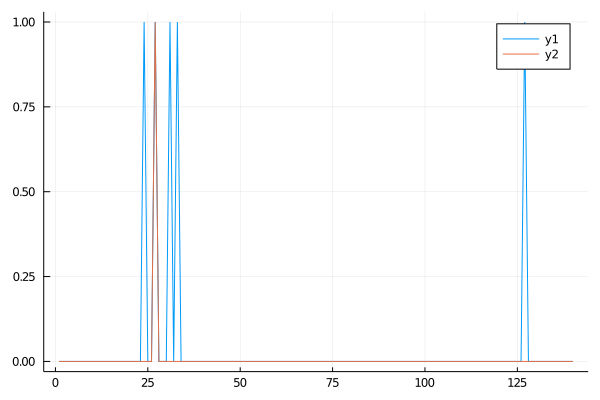

In [524]:
Plots.plot(results["time"], results["CustomersInfectedByDrivers"])
#Plots.plot!(results["time"], results["PackagesInfectiousOnDelivery"])
Plots.plot!(results["time"], results["CustomersInfectedByPkgs"])

In [535]:
include("param_sweeps.jl")
run_param_sweep_outbreak_parcel()

1


2


LoadError: [91mTaskFailedException:[39m
[91m[91mInterruptException:[39m[39m
[91mStacktrace:[39m
[91m [1] [1mWeights[22m at [1m/Users/carlwhitfield/.julia/packages/StatsBase/aknjg/src/weights.jl:13[22m [inlined] (repeats 2 times)[39m
[91m [2] [1mWeights[22m[1m([22m::Array{Int64,1}[1m)[22m at [1m/Users/carlwhitfield/.julia/packages/StatsBase/aknjg/src/weights.jl:16[22m[39m
[91m [3] [1mgenerate_graph![22m[1m([22m::Dict{String,Any}, ::Float64, ::Float64, ::Float64[1m)[22m at [1m/Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/network_transmission_workplace.jl:247[22m[39m
[91m [4] [1minitialise[22m[1m([22m::Dict{Any,Any}, ::Float64, ::Float64[1m)[22m at [1m/Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/network_transmission_workplace.jl:375[22m[39m
[91m [5] [1minitialise_novis[22m[1m([22m::Dict{Any,Any}, ::Dict{Any,Any}, ::Float64, ::Float64, ::Bool, ::Bool, ::Array{Float64,1}, ::Array{Float64,1}[1m)[22m at [1m/Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/network_transmission_workplace.jl:424[22m[39m
[91m [6] [1mrun_sim[22m[1m([22m::Dict{Any,Any}, ::Array{Float64,1}, ::Dict{Any,Any}, ::Array{Int64,1}; is_pairs::Bool, PairParams::Dict{Any,Any}, is_network::Bool, degree_logmean::Float64, degree_logstd::Float64, visualise::Bool, testing::Bool, TestParams::Dict{Any,Any}, Incidence::Array{Float64,1}, Prevalence::Array{Float64,1}[1m)[22m at [1m/Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/network_transmission_workplace.jl:1663[22m[39m
[91m [7] [1mmacro expansion[22m at [1m/Users/carlwhitfield/Documents/Github/Workplace_delivery_transmission/Workplace_delivery_transmission/Network_workplace_model/param_sweeps.jl:111[22m [inlined][39m
[91m [8] [1m(::var"#4604#threadsfor_fun#630"{Array{Int64,1},Array{Bool,1},Array{Bool,1},Array{Dict{Any,Any},1},Array{Bool,1},Array{Dict{Any,Any},1},Array{Dict{Any,Any},1},Array{Float64,1},Array{Dict{Any,Any},1},DataFrame,Int64,Dict{Any,Any},Int64,UnitRange{Int64}})[22m[1m([22m::Bool[1m)[22m at [1m./threadingconstructs.jl:81[22m[39m
[91m [9] [1m(::var"#4604#threadsfor_fun#630"{Array{Int64,1},Array{Bool,1},Array{Bool,1},Array{Dict{Any,Any},1},Array{Bool,1},Array{Dict{Any,Any},1},Array{Dict{Any,Any},1},Array{Float64,1},Array{Dict{Any,Any},1},DataFrame,Int64,Dict{Any,Any},Int64,UnitRange{Int64}})[22m[1m([22m[1m)[22m at [1m./threadingconstructs.jl:48[22m[39m

search: boxplot boxplot!



```
boxplot(x, y)
boxplot!(x, y)
```

Make a box and whisker plot.

# Keyword arguments

  * `notch`: Bool. Notch the box plot? (false)
  * `range`: Real. Values more than range*IQR below the first quartile          or above the third quartile are shown as outliers (1.5)
  * `outliers`: Bool. Show outliers? (true)
  * `whisker_width`: Real or Symbol. Length of whiskers (:match)

# Example

```julia-repl
julia> using StatsPlots
julia> boxplot(repeat([1,2,3],outer=100),randn(300))
```
